In [2]:
#  import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [3]:
# function to clean column names
def clear_cols(s):
    return s.strip().replace(" ","_")
# load data
path = '../Healthcare Provider Fraud Detection Analysis/Train_Beneficiarydata-1542865627584.csv'
df = pd.read_csv(path).rename(columns=clear_cols)
# display all columns
pd.set_option('display.max_columns', 50)

* Shape of dataset: `138,556` rows, and `25` columns.
* The number of unique beneficiaries -> `138,556`
* We have 98.97% patiant alive, and 1.03% dead
* Date of Birth in dataset between `1909-01-01` and `1983-12-01`.
* Date of Death in dataset between `2009-02-01` and `2009-12-01`.

- In every row we have null values. Should we `fillna` with '0' or leave it like that?


* How many providers and physicians worked together?
* Will it help to plot out the distribution of all the `int` / `float` columns with boxplot?

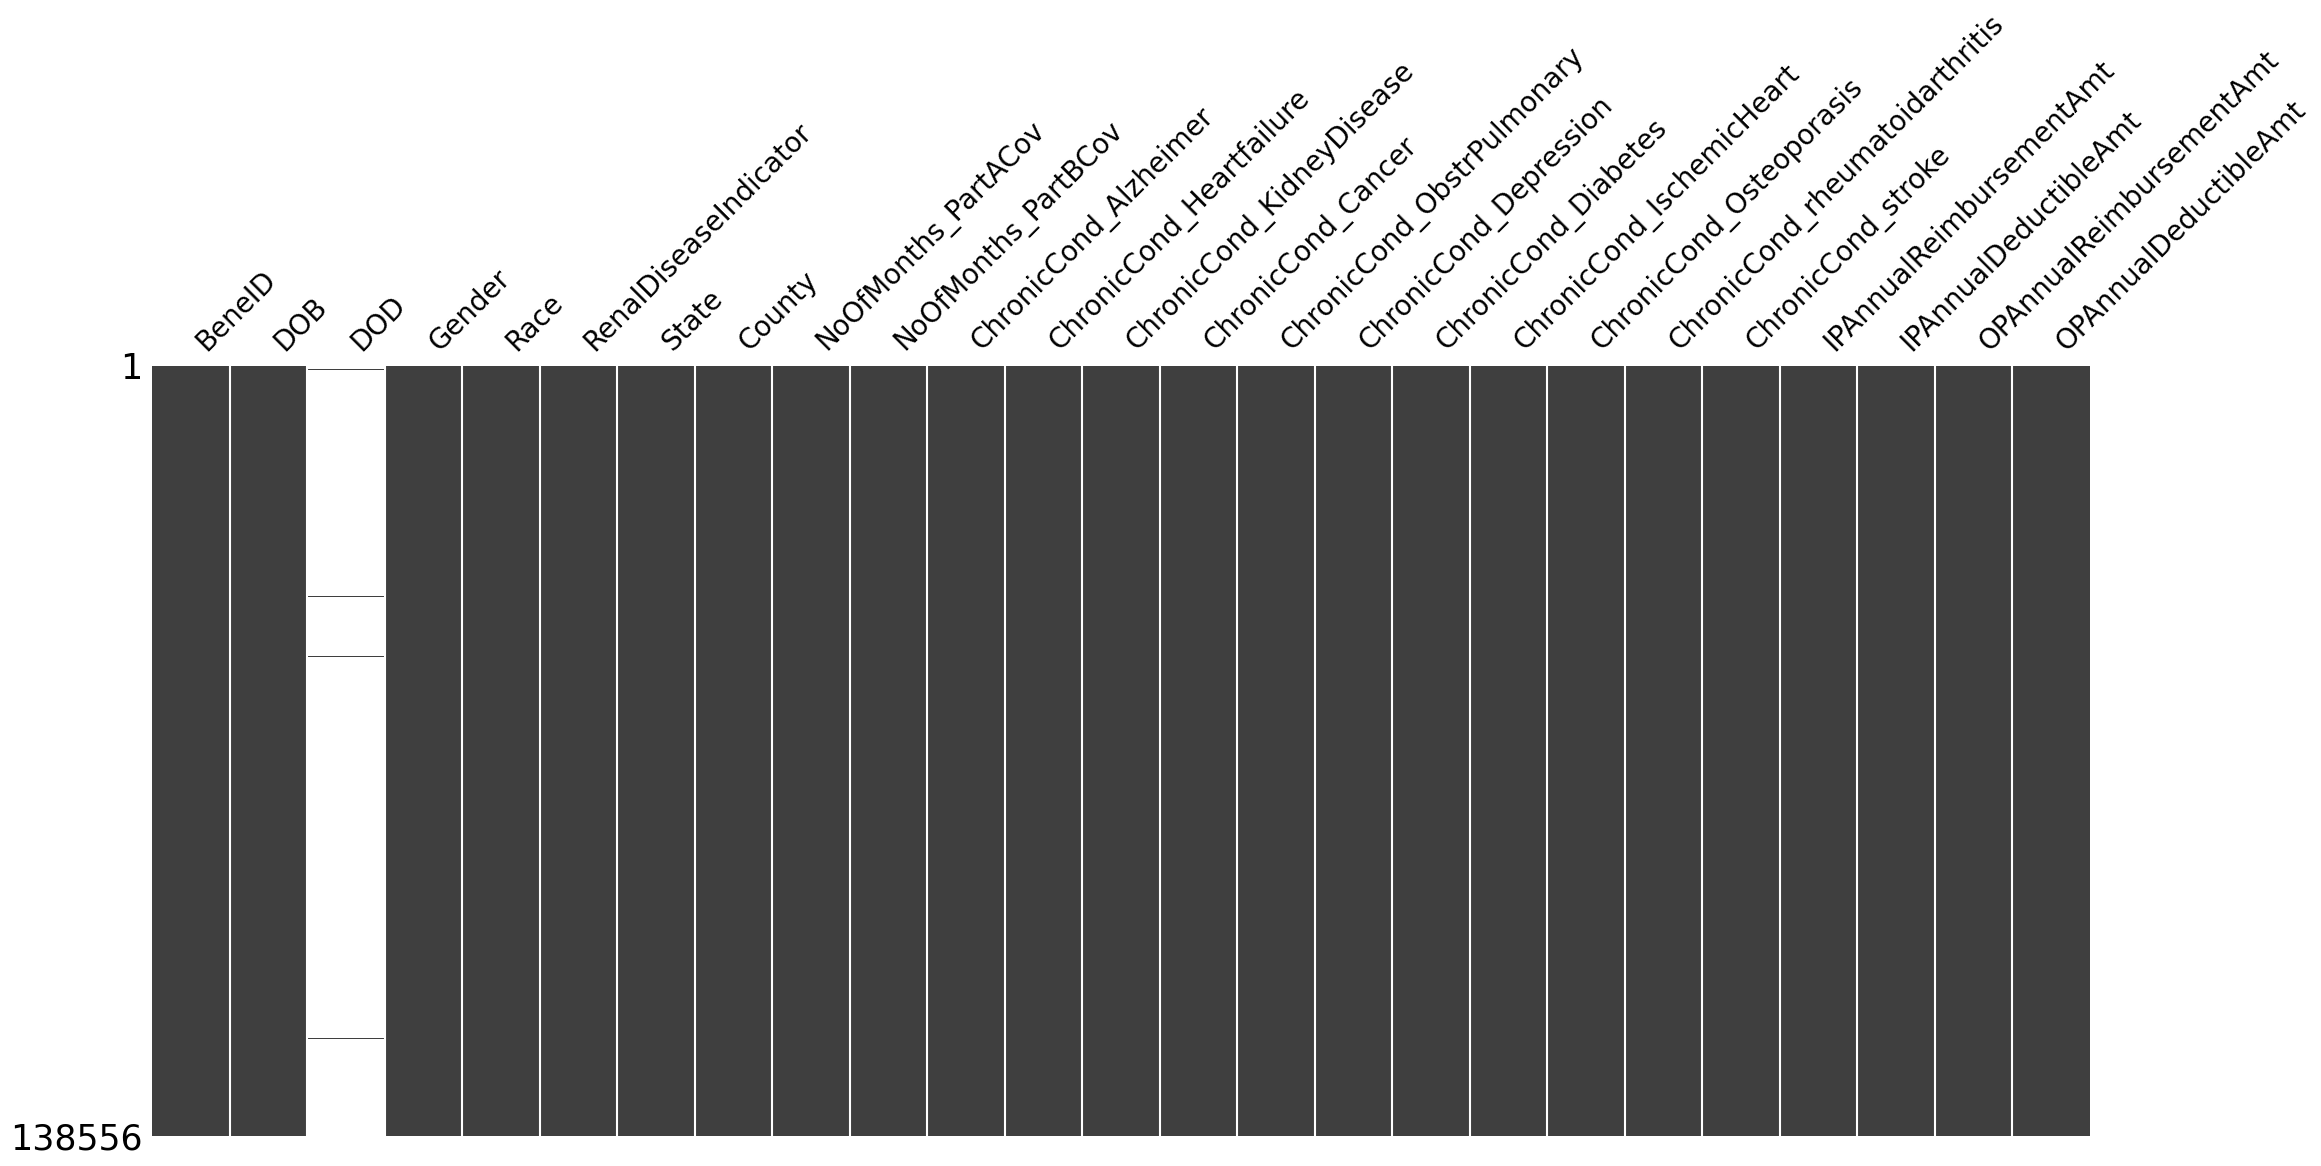

In [4]:
msno.matrix(df, sparkline=False, fontsize=20)
plt.show()

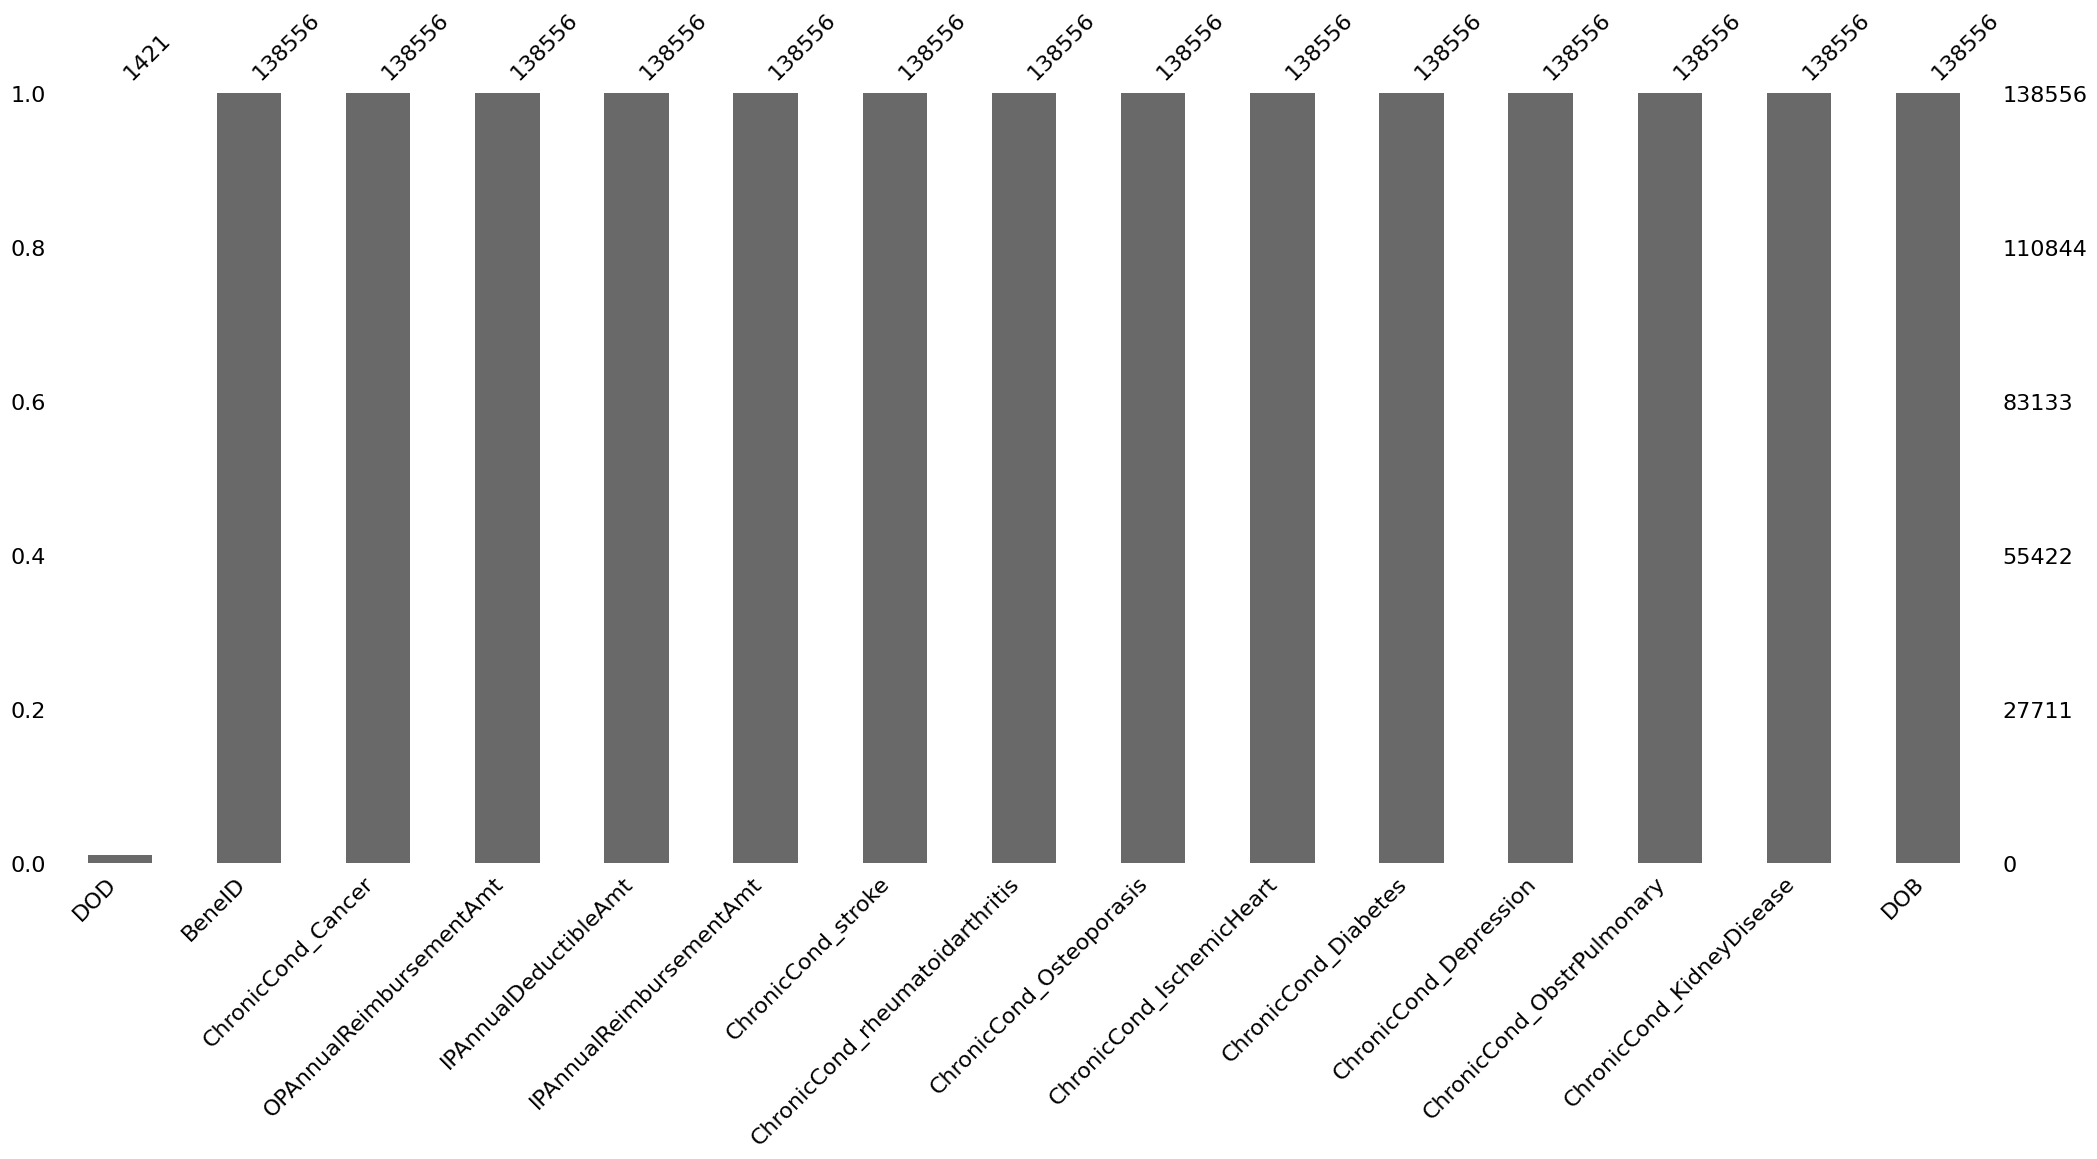

In [5]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Sort the DataFrame columns by the percentage of missing values
sorted_df = df[missing_info.sort_values(by='Percentage', ascending=False).index]

# Select the top 15 columns with the most missing values
top_15_missing = sorted_df.iloc[:, :15]

#Visual with missingno
msno.bar(top_15_missing)
plt.show()

In [6]:
print("shape: ", df.shape)
df.sample(5)

shape:  (138556, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
41946,BENE55914,1941-10-01,NaN,1,2,0,26,470,12,11,1,1,2,2,2,2,1,1,2,1,2,4040,1068,2120,1160
73753,BENE89938,1943-09-01,NaN,1,1,0,5,460,12,12,2,2,2,2,2,2,2,1,1,1,2,0,0,260,440
113834,BENE132783,1951-07-01,NaN,1,2,0,15,700,12,12,2,1,2,2,2,2,2,1,2,2,2,0,0,30,80
46230,BENE60516,1943-11-01,NaN,2,2,0,1,570,12,12,2,2,2,2,2,1,2,1,2,2,2,0,0,520,110
35206,BENE48740,1928-04-01,NaN,1,1,0,33,331,12,12,2,2,2,2,2,2,2,1,1,2,2,0,0,300,0


In [7]:
df.columns.to_list()

['BeneID',
 'DOB',
 'DOD',
 'Gender',
 'Race',
 'RenalDiseaseIndicator',
 'State',
 'County',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke',
 'IPAnnualReimbursementAmt',
 'IPAnnualDeductibleAmt',
 'OPAnnualReimbursementAmt',
 'OPAnnualDeductibleAmt']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [9]:
df['DOB'] = pd.to_datetime(df['DOB'])
df['DOD'] = pd.to_datetime(df['DOD'])
# df.info()

In [10]:
df.describe()

,DOB,DOD,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556,1421,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1936-04-30 16:46:00.772539520,2009-07-27 22:27:46.995073792,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,1.762847,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
min,1909-01-01 00:00:00,2009-02-01 00:00:00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1928-01-01 00:00:00,2009-06-01 00:00:00,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,1935-09-01 00:00:00,2009-08-01 00:00:00,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,1941-12-01 00:00:00,2009-10-01 00:00:00,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,1983-12-01 00:00:00,2009-12-01 00:00:00,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000
std,NaN,NaN,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,0.425339,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187


In [11]:
df.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

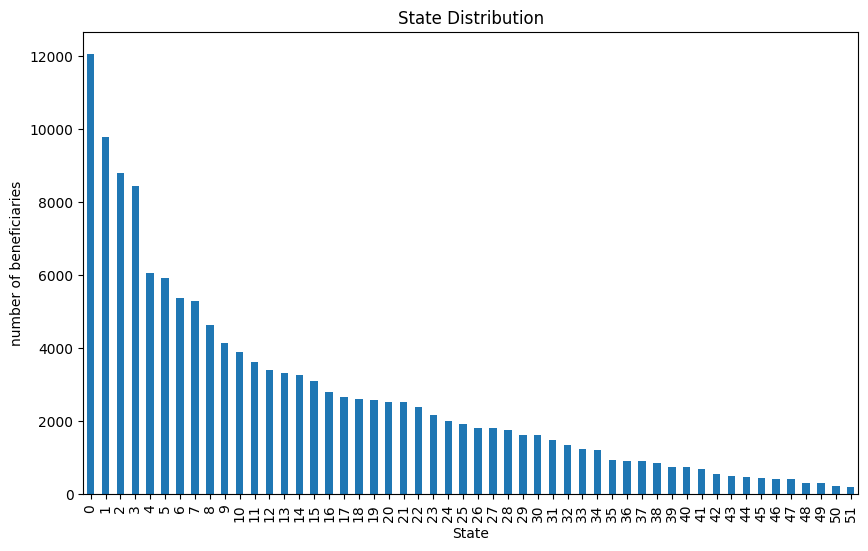

In [12]:
state = df['State'].value_counts().reset_index().sort_values(by='count', ascending=False)
state['count'].plot(kind='bar', figsize=(10, 6))
plt.title('State Distribution')
plt.xlabel('State')
plt.ylabel('number of beneficiaries')
plt.show()

In [13]:
df['BeneID'].value_counts().sort_values(ascending=False)

BeneID
BENE11001     1
BENE11019     1
BENE11005     1
BENE11006     1
BENE11007     1
             ..
BENE159197    1
BENE159182    1
BENE159059    1
BENE159165    1
BENE159198    1
Name: count, Length: 138556, dtype: int64

In [14]:
print(f"The number of unique beneficiaries -> {df['BeneID'].nunique()}")

The number of unique beneficiaries -> 138556


Gender
2    79106
1    59450
Name: count, dtype: int64


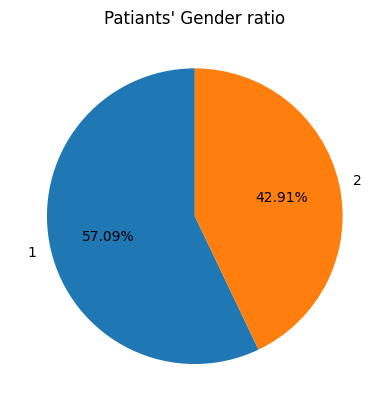

In [15]:
print(df['Gender'].value_counts())

plt.pie(df['Gender'].value_counts(), labels=['1','2'], autopct='%1.2f%%',startangle=90)
plt.title("Patiants' Gender ratio")
plt.show()

Race
1    117057
2     13538
3      5059
5      2902
Name: count, dtype: int64


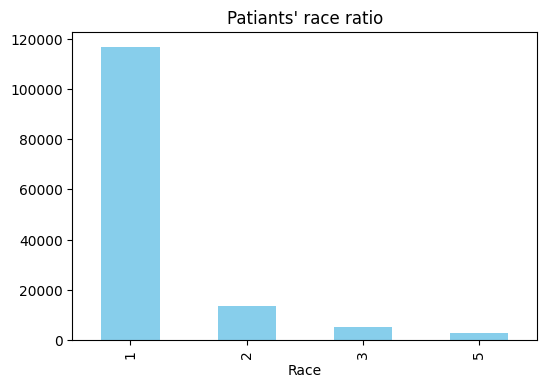

In [16]:
print(df['Race'].value_counts())

# df['race'].plot()
df['Race'].value_counts().plot(kind='bar', figsize=(6, 4),color='skyblue')
plt.title("Patiants' race ratio")
plt.show()

In [17]:
def plot_bar(data, columns, figsize=(5, 5)):
    """
    Plots bar plots for the specified columns in the dataframe.

    Parameters:
        data (pd.DataFrame): The dataframe containing the data.
        columns (list): List of column names to plot.
        figsize (tuple): Figure size for the plots.
    """
    for col in columns:
        if col in data.columns:
            # Calculate value counts and percentages
            value_counts = data[col].value_counts()
            percentages = value_counts / value_counts.sum() * 100
            
            # Plot bar chart
            plt.figure(figsize=figsize)
            ax = value_counts.plot(kind='bar')
            
            # Add percentage labels to bars
            for i, (count, pct) in enumerate(zip(value_counts, percentages)):
                ax.text(i, count + 0.5, f'{pct:.2f}%', ha='center')
            
            plt.title(f'Bar Plot of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.ylim(0, value_counts.max() * 1.2)  # Add some space for the labels
            plt.show()

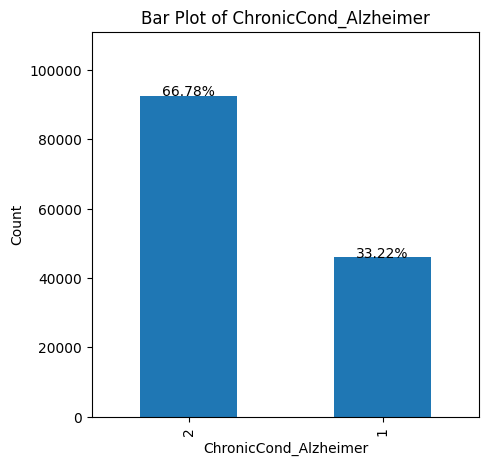

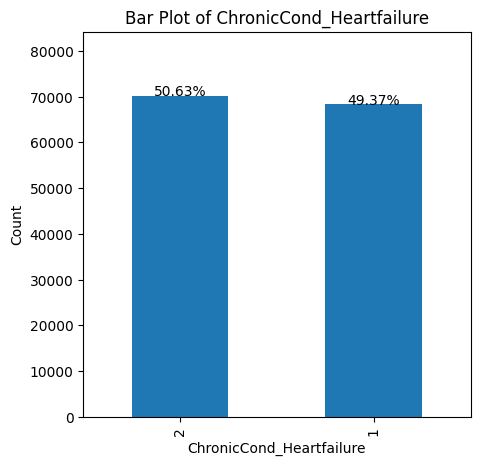

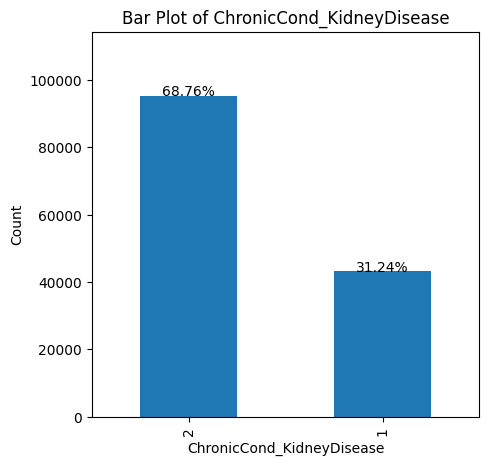

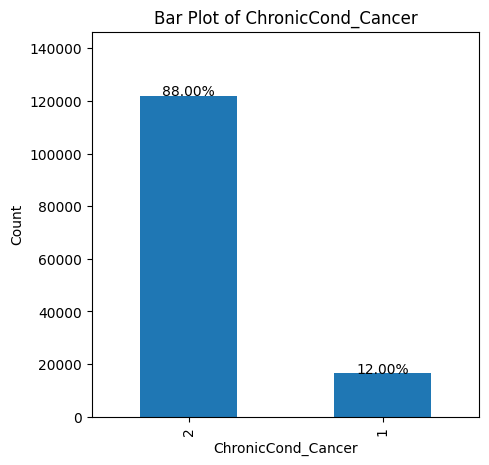

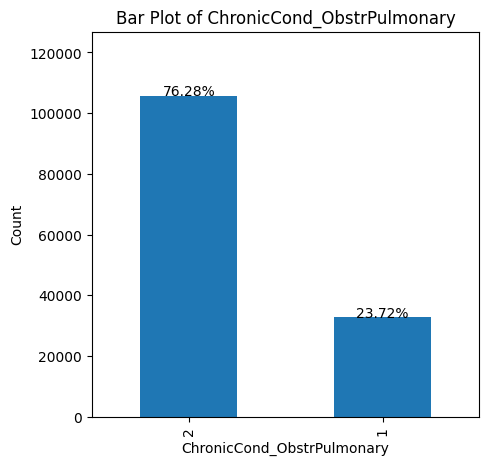

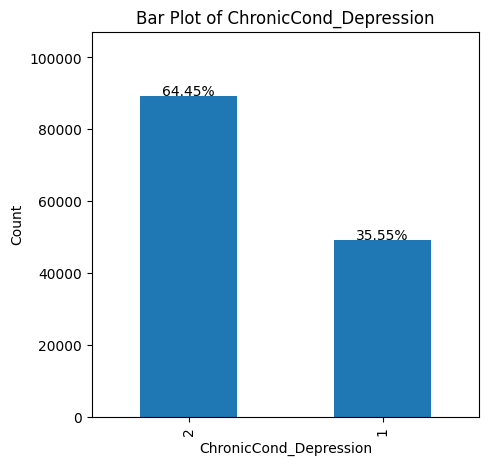

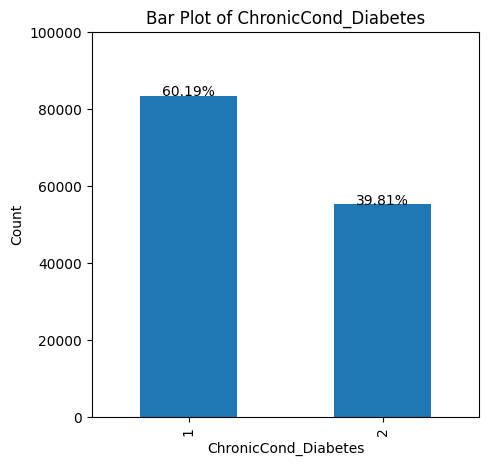

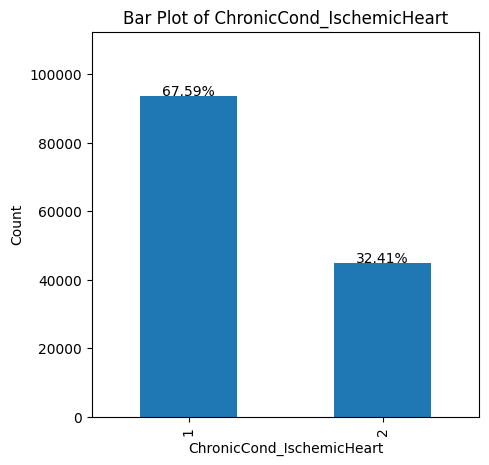

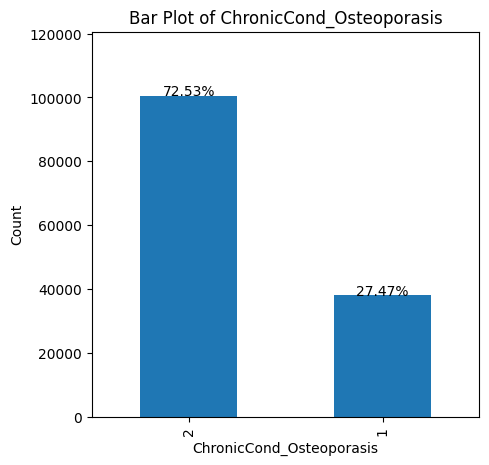

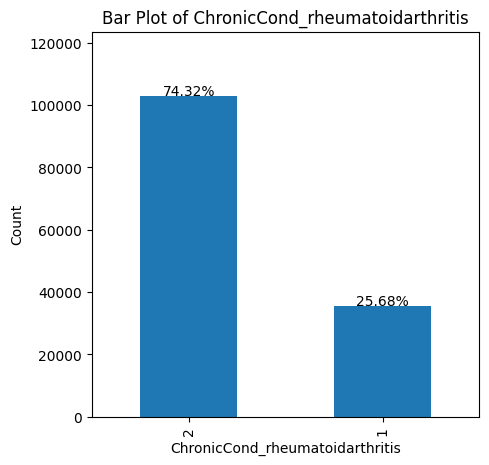

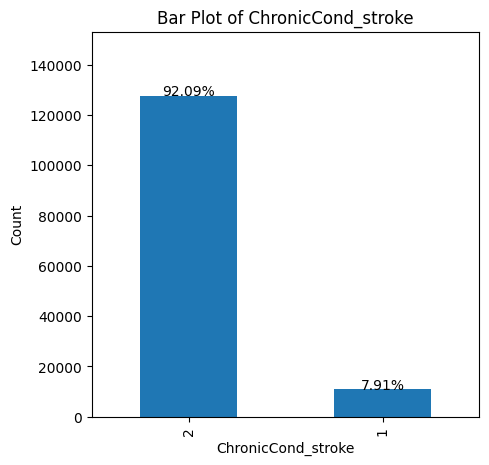

In [18]:
columns_to_plot = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']
plot_bar(df, columns_to_plot)

<Axes: xlabel='RenalDiseaseIndicator'>

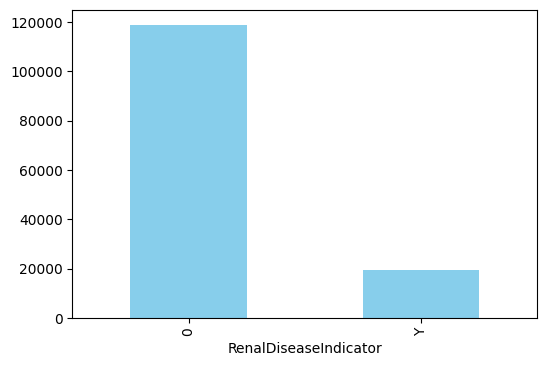

In [19]:
df['RenalDiseaseIndicator'].value_counts().plot(kind='bar', figsize=(6, 4),color='skyblue')

In [20]:
df['RenalDiseaseIndicator'].value_counts()

RenalDiseaseIndicator
0    118978
Y     19578
Name: count, dtype: int64

<Axes: xlabel='ChronicCond_Alzheimer'>

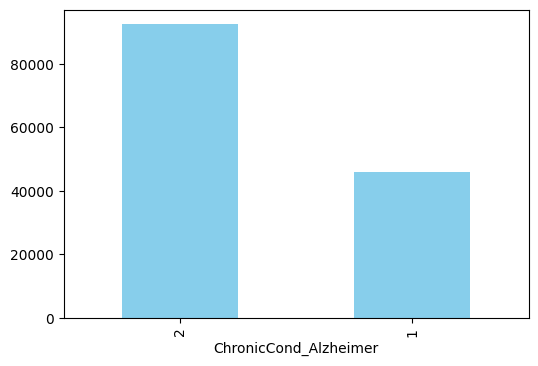

In [21]:
df['ChronicCond_Alzheimer'].value_counts().plot(kind='bar', figsize=(6, 4),color='skyblue')

<Axes: xlabel='ChronicCond_Heartfailure'>

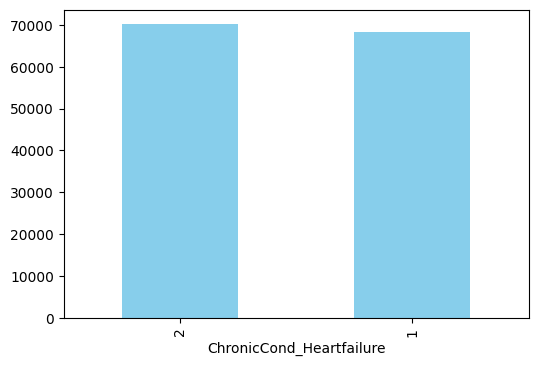

In [22]:
df['ChronicCond_Heartfailure'].value_counts().plot(kind='bar', figsize=(6, 4),color='skyblue')

In [23]:
%matplotlib inline

<Axes: xlabel='ChronicCond_KidneyDisease'>

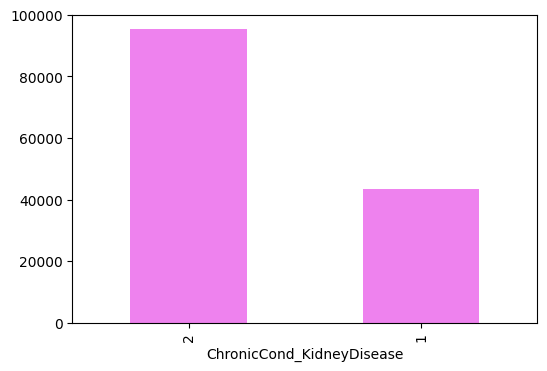

In [24]:
df['ChronicCond_KidneyDisease'].value_counts().plot(kind='bar', figsize=(6, 4),color='violet')

<Axes: xlabel='ChronicCond_Cancer'>

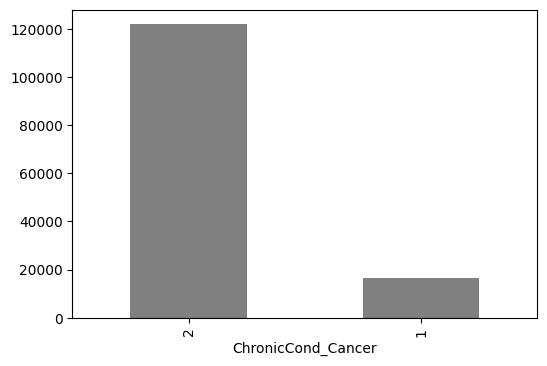

In [25]:
df['ChronicCond_Cancer'].value_counts().plot(kind='bar', figsize=(6, 4),color='gray')

<Axes: xlabel='ChronicCond_ObstrPulmonary'>

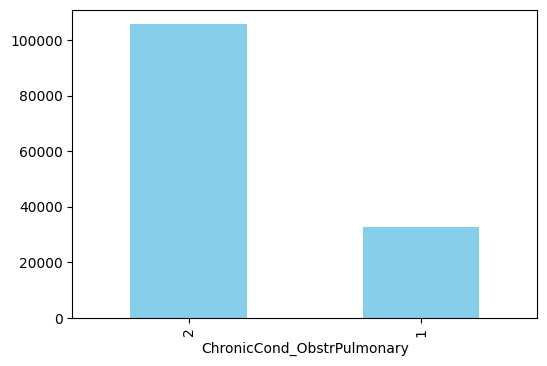

In [26]:
df['ChronicCond_ObstrPulmonary'].value_counts().plot(kind='bar', figsize=(6, 4),color='skyblue')

<Axes: xlabel='ChronicCond_Depression'>

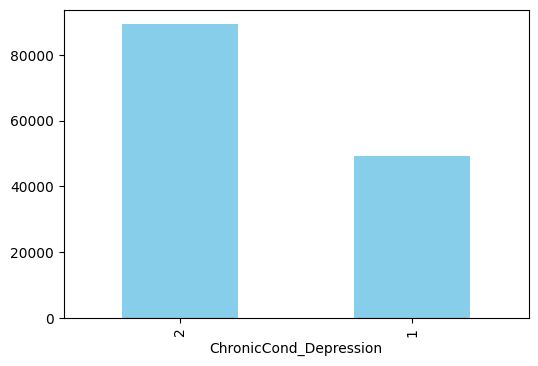

In [27]:
df['ChronicCond_Depression'].value_counts().plot(kind='bar', figsize=(6, 4),color='skyblue')

<Axes: xlabel='ChronicCond_Diabetes'>

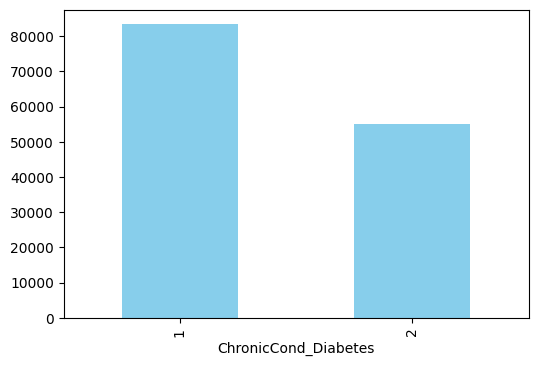

In [28]:
df['ChronicCond_Diabetes'].value_counts().plot(kind='bar', figsize=(6, 4),color='skyblue')

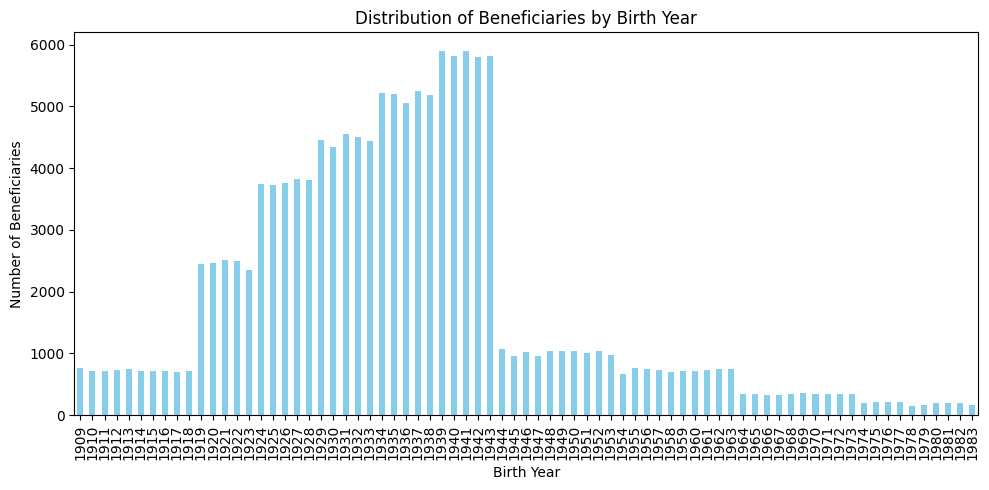

In [29]:
df['BirthYear'] = df['DOB'].dt.year
year_counts = df['BirthYear'].value_counts().sort_index()

plt.figure(figsize=(10, 5)) 
year_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Beneficiaries by Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Number of Beneficiaries')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# load inpatiant data
# path = '../Healthcare Provider Fraud Detection Analysis/Train_Inpatientdata-1542865627584.csv'
# df_Inpatiant = pd.read_csv(path).rename(columns=clear_cols)


In [31]:
# small_1 = df[['BeneID','DOB']]
# small_2 = df_Inpatiant[['BeneID','ClaimID','']]
# age_data  = df.merge()

**I don't think I can know the age of the benefitiaries based on the dataset. I saw others that calculate the max value of DOD, but it doesn't give me the feeling it's the age of all of the patiants**

In [32]:
df['DOD'].value_counts()

DOD
2009-12-01    182
2009-10-01    168
2009-09-01    164
2009-11-01    149
2009-08-01    144
2009-07-01    141
2009-05-01    119
2009-06-01    119
2009-04-01     94
2009-03-01     91
2009-02-01     50
Name: count, dtype: int64

In [33]:
df['DOD'].min() , df['DOD'].max()

(Timestamp('2009-02-01 00:00:00'), Timestamp('2009-12-01 00:00:00'))

In [34]:
df['DOD'] = df['DOD'].apply(lambda val: 0 if val != val else 1)

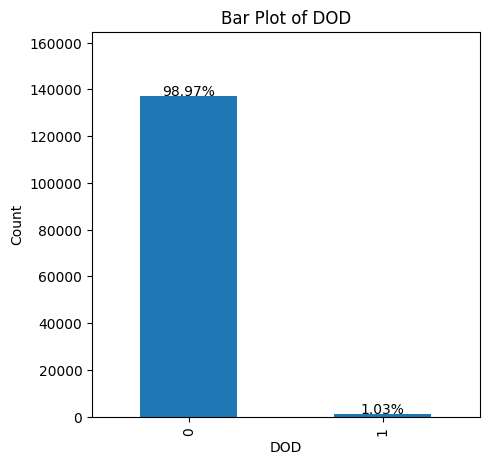

In [35]:
plot_bar(df, ['DOD'])

I can assume that we have 98.97% patiant alive, and 1.03% dead

In [36]:
part_a = df['NoOfMonths_PartACov'].value_counts().reset_index().sort_values(
    by='NoOfMonths_PartACov', ascending=False
    ).rename(columns={'NoOfMonths_PartACov': 'NOM_part_A'})
part_a

,NOM_part_A,count
0,12,137389
3,11,28
5,10,18
9,9,7
4,8,26
6,7,16
2,6,38
8,5,8
7,4,13
10,3,5


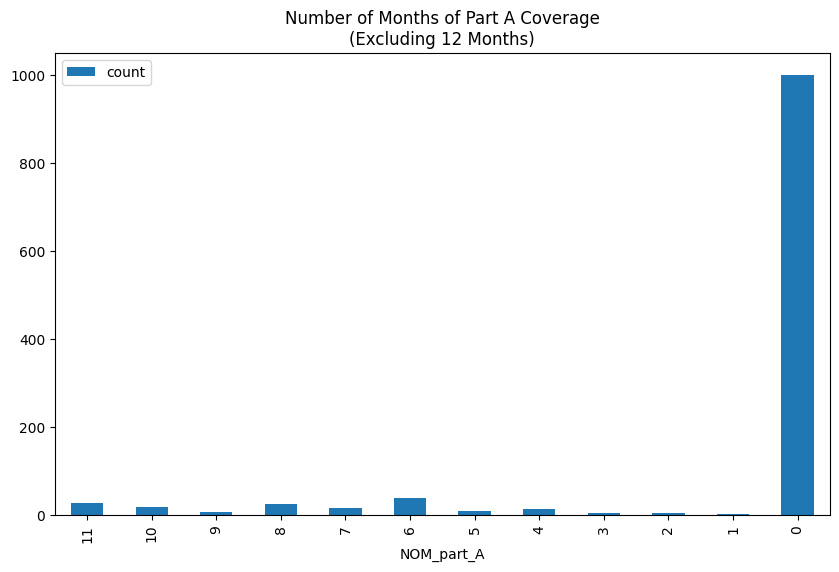

In [46]:
# Plot the number of months of Part A coverage excluding the 12 months
part_a.tail(12).plot(kind='bar', x='NOM_part_A', y='count', figsize=(10, 6))
plt.title('Number of Months of Part A Coverage\n(Excluding 12 Months)')
plt.show()

I removed from this plot the most common answer here (12 months) so i can see the rest of the answers split.
- the most common answer was 12 months with 137389 participants.

In [38]:
part_b = df['NoOfMonths_PartBCov'].value_counts().reset_index().sort_values(
    by='NoOfMonths_PartBCov', ascending=False
    ).rename(columns={'NoOfMonths_PartBCov': 'NOM_part_B'})
part_b

,NOM_part_B,count
0,12,136902
4,11,143
3,10,150
5,9,122
6,8,71
7,7,63
2,6,282
8,5,50
9,4,35
10,3,27


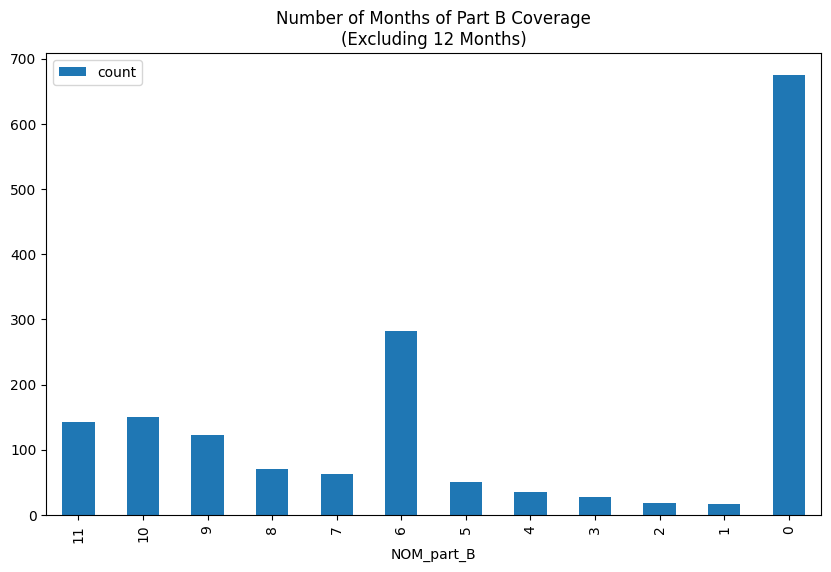

In [47]:
# Plot the number of months of Part B coverage excluding the 12 months
part_b.tail(12).plot(kind='bar', x='NOM_part_B', y='count', figsize=(10, 6),)
# fig.annotate(f'{str(round((height*100)/train_bene_df.shape[0],2))+"%"}', (x + width/2, y + height*1.02), ha='center', fontsize=13.5, rotation=0)
plt.title('Number of Months of Part B Coverage\n(Excluding 12 Months)')
plt.show()

I removed the most common answer here (12 months) so i can see the rest of the answers split.
- the most common answer was 12 months with 136902 participants.

In [40]:
df['DOB'].min() , df['DOB'].max()

(Timestamp('1909-01-01 00:00:00'), Timestamp('1983-12-01 00:00:00'))

In [48]:
# Converting to integer and checking if there are any non-integer values
def int_check(col):
    """
    To check if all the values in a column are integers.
    col: column to check
    """
    try:
        df[col] = df[col].astype(int)
        print("All values are integers.")
    except ValueError as e:
        print("There are non-integer values in the column.")

In [42]:
money = df[['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']]
money.describe()

,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000
mean,3660.346502,399.847296,1298.219348,377.718258
std,9568.621827,956.175202,2493.901134,645.530187
min,-8000.000000,0.000000,-70.000000,0.000000
25%,0.000000,0.000000,170.000000,40.000000
50%,0.000000,0.000000,570.000000,170.000000
75%,2280.000000,1068.000000,1500.000000,460.000000
max,161470.000000,38272.000000,102960.000000,13840.000000


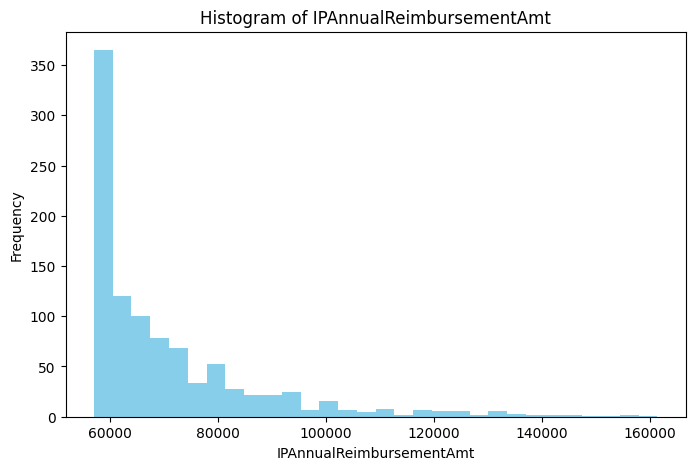

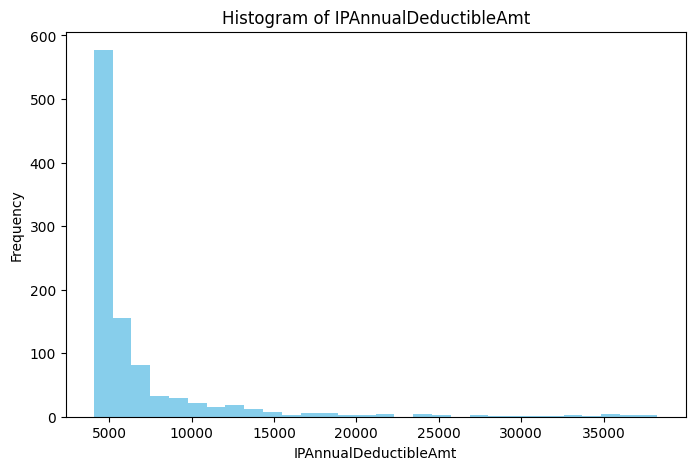

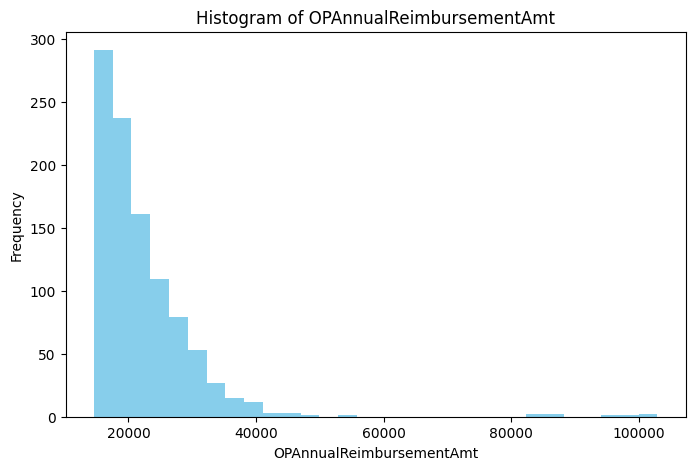

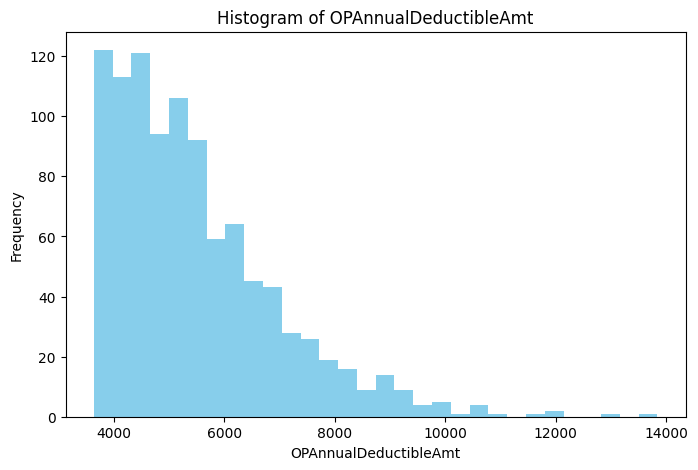

In [65]:
def plot_hist(cols):
    """
    Plots histograms for the specified columns in the dataframe.

    Parameters:
        cols (list): List of column names to plot.
    """
    for col in cols:
        if col in df.columns:
            plt.figure(figsize=(8, 5))
            df[col].nlargest(1000).plot(kind='hist', bins=30, color='skyblue')
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()


plot_hist(['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt'])